In [1]:
# import snappy
# from snappy import GPF
# from snappy import ProductIO

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import tensorflow as tf
import random

import sys
sys.path.append('../')
import init
import sis_toolbox as tbx
from sis_toolbox import RGBProfile as rgb


2023-07-16 23:10:42.713805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 23:10:42.786547: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


init loaded


In [ ]:
########## RISK TO OVERWRITE FILES

# # tif_files = [os.path.join(PATH, f'tif{TILESIZE}/00005_12x3405.tif')]
# tif_files = glob.glob(os.path.join(PATH, f'tif{TILESIZE}/*.tif'))
# for tif_file in tif_files:
#     tif_filename = os.path.splitext(os.path.basename(tif_file))[0]
#     tensor_filename = os.path.join(PATH, f'tfrecords{TILESIZE}/{tif_filename}.tfrecord')

#     if os.path.exists(tensor_filename):
#         print(f'File {tensor_filename} already exists')
#         os.rename(tif_file, f'{tif_file}_tfexisting')
#         continue
#     print(f'File {tensor_filename} is new')

#     raw_tiff = rasterio.open(tif_file)
#     tbx.save_tfrecord(raw_tiff, tensor_filename)
#     os.rename(tif_file, f'{tif_file}_tfcreated')


In [4]:
# Tests with one example only

raw_tiff = rasterio.open(os.path.join(init.DATA_ROOT, 'tif256/00278_8886x9147.tif_tfcreated'))
tensorpath = os.path.join(init.DATA_ROOT, 'test2.tfrecord')
tbx.save_tfrecord_alt(raw_tiff, tensorpath)


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [2]:
files = os.listdir(os.path.join(init.DATA_ROOT, 'tif256/'))
selected_files = random.sample(files, k=10)

for file in selected_files:
    filename = os.path.splitext(file)[0]
    print('Filename:', filename)

    raw_tiff = rasterio.open(os.path.join(init.DATA_ROOT, 'tif256', file))
    tensorpath = os.path.join(init.DATA_ROOT, 'tfrecords256_alt', f'{filename}.tfrecord')
    tbx.save_tfrecord_alt(raw_tiff, tensorpath, downsample=4)


Filename: 00257_795x273


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00253_1317x6798


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00126_9408x3666


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00106_5754x8886


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00254_8103x8625


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00189_6276x1839


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00233_7320x9408


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00090_4449x8103


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00268_7320x1056


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Filename: 00087_6015x2100


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


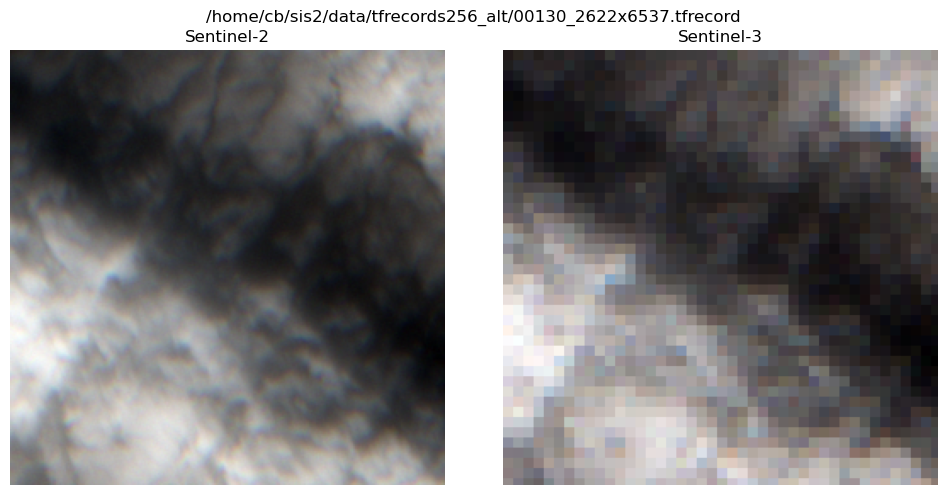

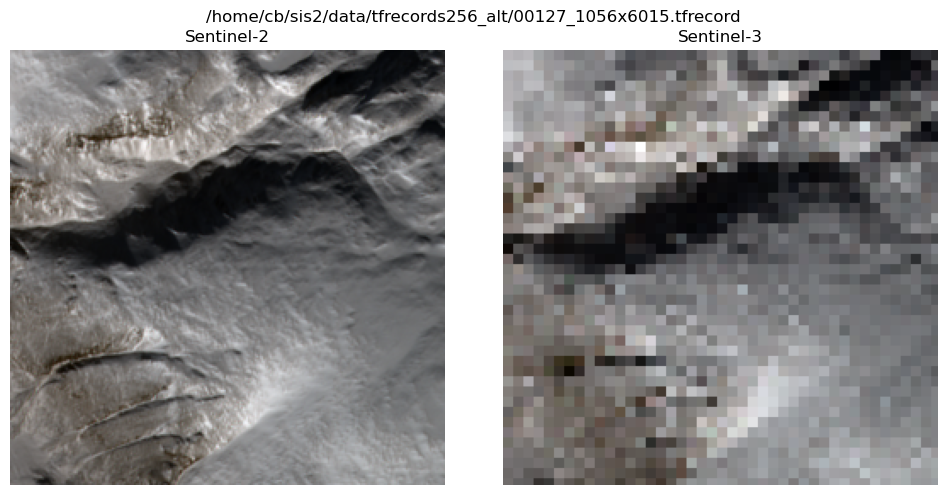

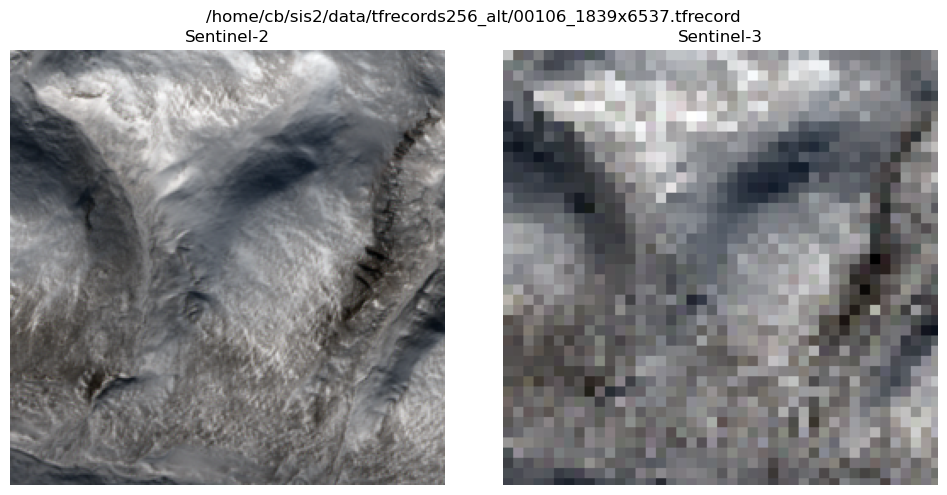

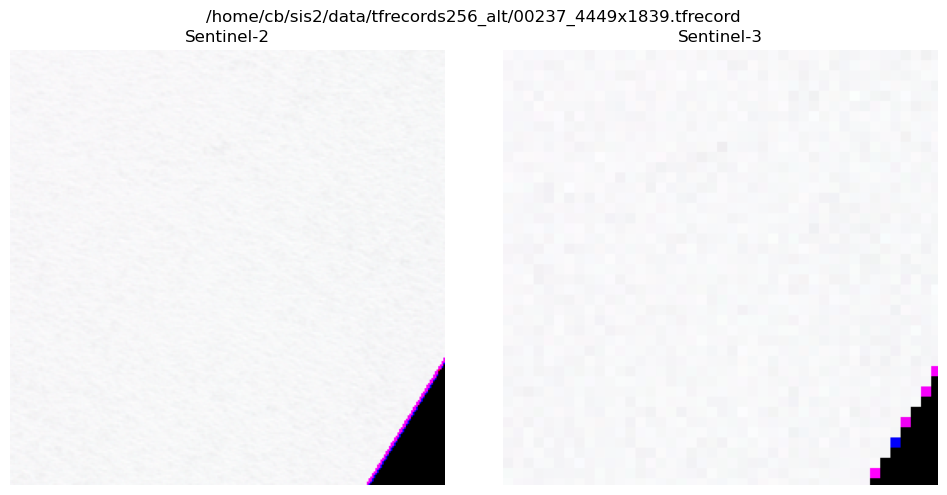

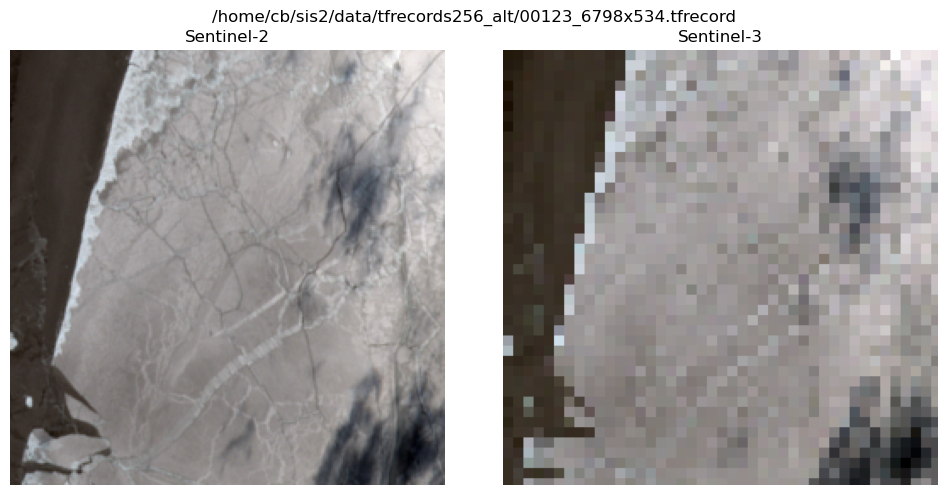

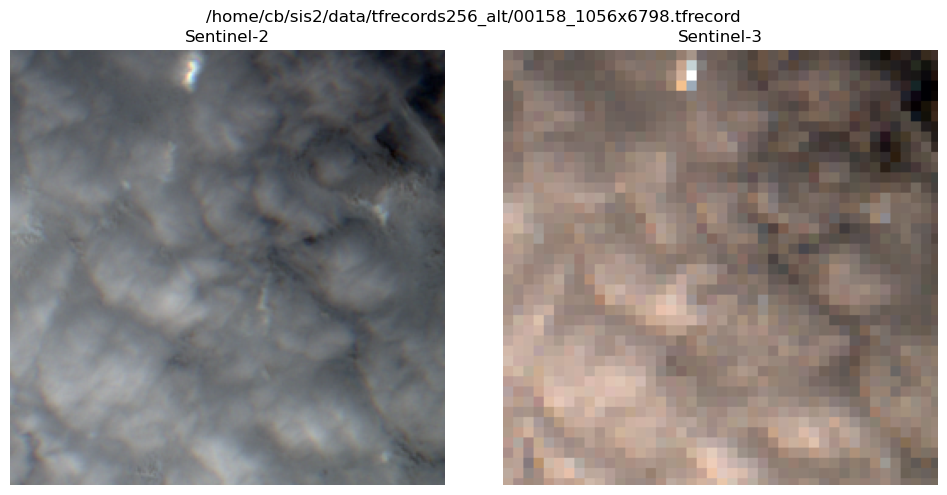

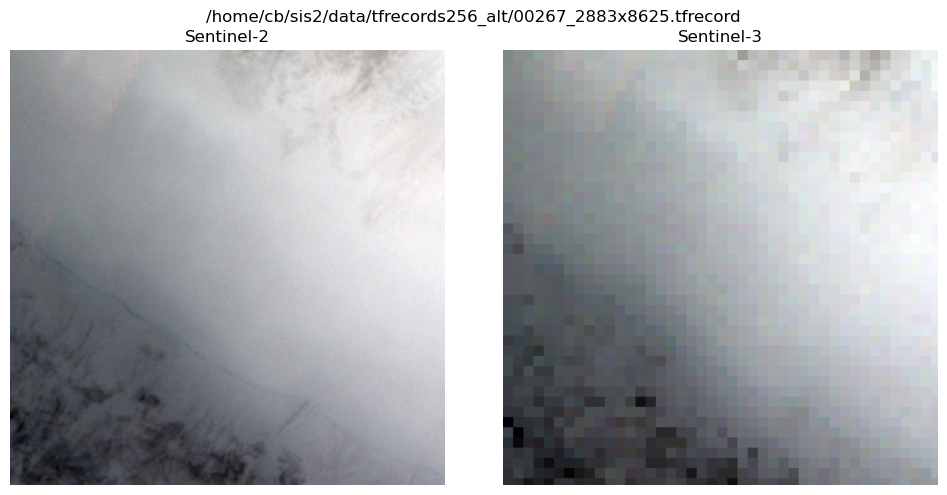

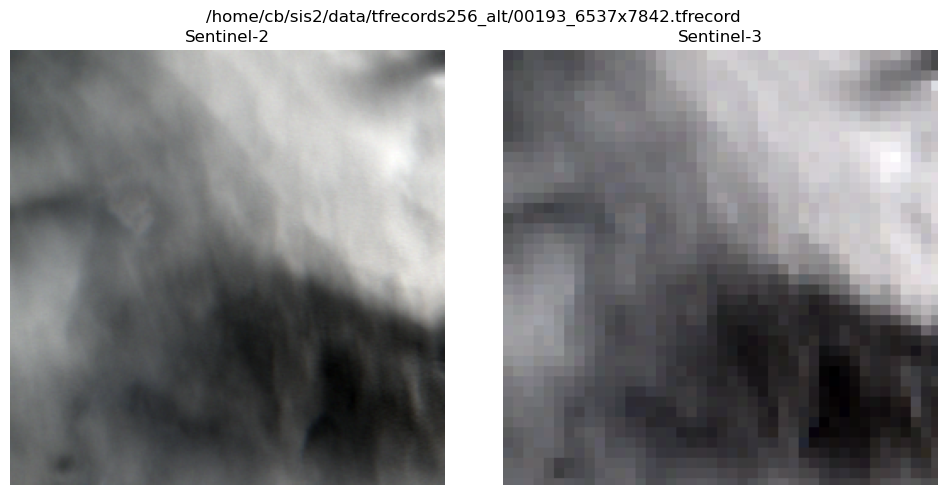

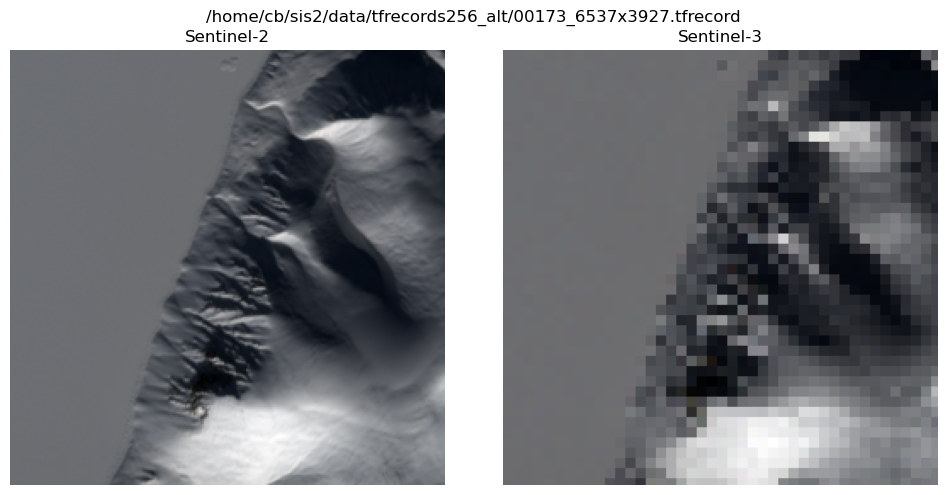

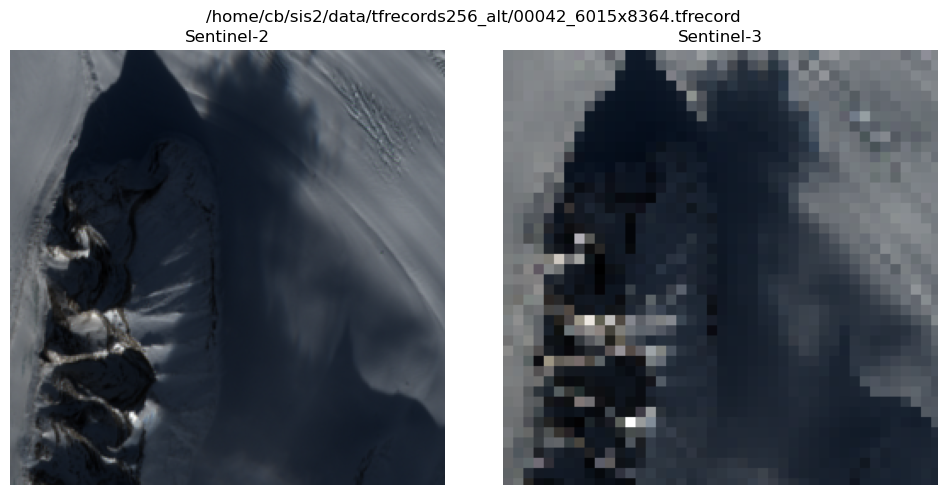

In [5]:
# Directory containing the TFRecord files
data_dir = os.path.join(init.DATA_ROOT, 'tfrecords256_alt')

# Get a list of all TFRecord files in the directory
file_list = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.tfrecord')]

for sample_file in file_list:

    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:
        inp, re = tbx.parse_tfrecord_alt(element, 256)
        
        fig, ax = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle(sample_file)
        tbx.plot_tensor(inp, rgb.S2, ax=ax[0])
        tbx.plot_tensor(re, rgb.S2, ax=ax[1])
        ax[0].set_title('Sentinel-2')
        ax[1].set_title('Sentinel-3')
        plt.tight_layout()
        plt.show()

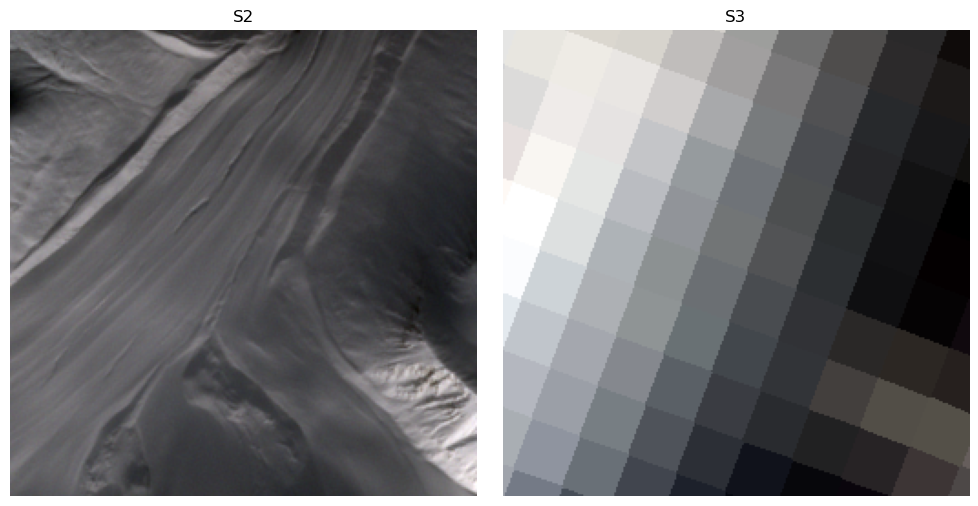

In [14]:
tbx.plot_tiff_sbs(raw_tiff)

In [32]:
raw_np = np.transpose(raw_tiff.read(), (1, 2, 0))
raw_s2 = raw_np[:,:,2:5]
array_85x85 = raw_s2[::4, ::4]
expanded_array = np.kron(array_85x85, np.ones((4, 4, 1)))
cropped_array = expanded_array[:256, :256, :]


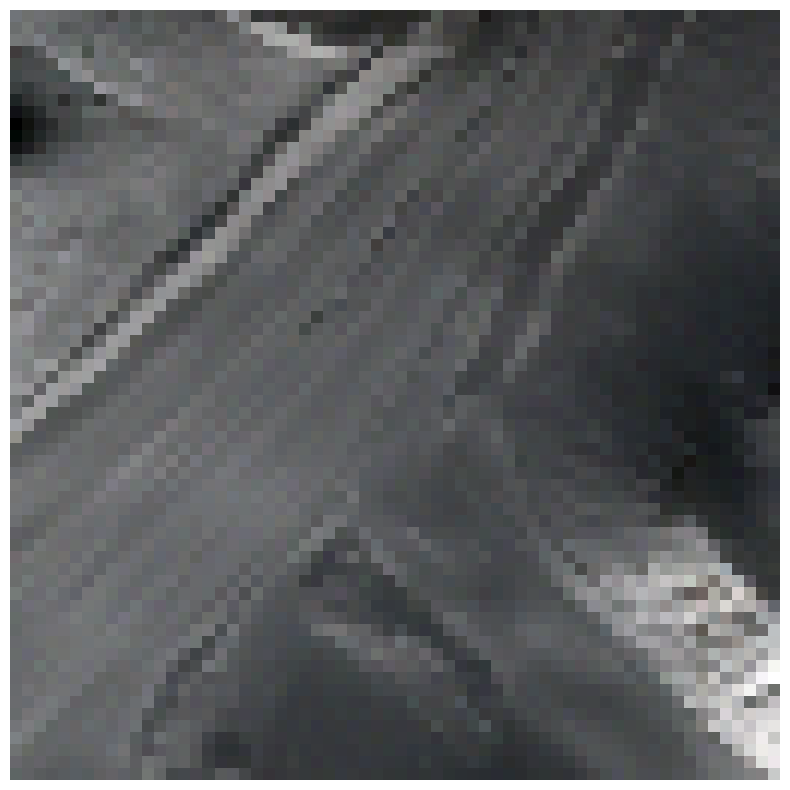

In [34]:
red_band = tbx.normalize_numpy(cropped_array[:,:,2])
green_band = tbx.normalize_numpy(cropped_array[:,:,1])
blue_band = tbx.normalize_numpy(cropped_array[:,:,0])

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()


#### Validation: Read and display tfrecords

In [ ]:
# Create a TFRecordDataset
dataset = tf.data.TFRecordDataset(os.path.join(PATH, 'tfrecords/test.tfrecord'))
parsed_dataset = dataset.map(tbx.parse_tfrecord)

first_example = next(iter(parsed_dataset))

# import importlib
# importlib.reload(helper)

# first_example[0].numpy()[:,:,0].shape

fig, ax = plt.subplots(1, 2)
tbx.plot_tensor(first_example[0], RGBProfile.S2, ax=ax[0])
tbx.plot_tensor(first_example[1], RGBProfile.S3, ax=ax[1])
plt.show()

In [ ]:

# Directory containing the TFRecord files
data_dir = os.path.join(PATH, 'tfrecords/')

# Get a list of all TFRecord files in the directory
file_list = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.tfrecord')]

for sample_file in file_list:

    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:
        inp, re = tbx.parse_tfrecord(element)
        
        fig, ax = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle(sample_file)
        tbx.plot_tensor(inp, RGBProfile.S2, ax=ax[0])
        tbx.plot_tensor(re, RGBProfile.S3, ax=ax[1])
        ax[0].set_title('Sentinel-2')
        ax[1].set_title('Sentinel-3')
        plt.tight_layout()
        plt.show()



In [ ]:
# tfrecord_files = glob.glob(os.path.join(PATH, 'tfrecords/*.tfrecord'))
# for tfrecord_file in tfrecord_files:
#     print(tfrecord_file)
#     dataset = tf.data.TFRecordDataset(tfrecord_file)
#     # parsed_dataset = dataset.map(helper.parse_tfrecord)

#     for sample in dataset:
#         print(sample)
#         # # first_example = next(iter(parsed_dataset))
#         # s2_sample, s3_sample = helper.parse_tfrecord(sample)
#         # helper.plot_tensor(s2_sample, RGBProfile.S2)
#         # helper.plot_tensor(s3_sample, RGBProfile.S3)



In [ ]:
# # Directory containing the TFRecord files
# data_dir = '/home/cb/sis/data/tfrecords'

# # Get a list of all TFRecord files in the directory
# file_list = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.tfrecord')]

# dataset = tf.data.TFRecordDataset(file_list)
# # dataset = tf.data.TFRecordDataset.list_files(data_dir + '/*.tfrecord')


# dataset = dataset.map(helper.parse_tfrecord)
# # dataset = dataset.shuffle(...)
# # dataset = dataset.batch(...)

# for sample_file in file_list:
#     print(sample_file)

#     sample_dataset = tf.data.TFRecordDataset(sample_file)
#     for element in sample_dataset:
#         s2_tensor, s3_tensor = helper.parse_tfrecord(element)
        
#         helper.plot_tensor(s2_tensor, RGBProfile.S2)
#         helper.plot_tensor(s3_tensor, RGBProfile.S3)


In [ ]:
# dataset = tf.data.TFRecordDataset.list_files(os.path.join(PATH, 'tfrecords/'))
# parsed_dataset = dataset.map(helper.parse_tfrecord)

# for raw_s2, raw_s3 in parsed_dataset:
#     # Use the arrays for training
#     # model.train(array_256, array_128, ...)
#     print(raw_s2.shape)
#     print(raw_s3.shape)
#     # plot_feature_rgb(array_256.numpy())

In [ ]:
# import tifffile

# train_feature_file = os.path.join(PATH, 'collocated/tile_5x5.tif')
# train_feature = tifffile.imread(train_feature_file)

# print(train_feature.shape)

# print(np.amax(train_feature[0]))
# print(np.amax(train_feature[1]))
# print(np.amax(train_feature[2]))
# print(np.amax(train_feature[3]))
# print(np.amax(train_feature))


In [ ]:
# gdal_dataset = gdal.Open(os.path.join(PATH, 'collocated/collocate.tif'))

# red_band = helper.normalize_numpy(gdal_dataset.GetRasterBand(2).ReadAsArray())
# green_band = helper.normalize_numpy(gdal_dataset.GetRasterBand(40).ReadAsArray())
# blue_band = helper.normalize_numpy(gdal_dataset.GetRasterBand(40).ReadAsArray())

# # Stack the bands to create the RGB image
# rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# # Display the RGB image
# plt.figure(figsize=(10,10))
# plt.imshow(rgb_image)
# plt.axis('off')
# plt.show()

# # Get the number of bands (layers)
# num_bands = gdal_dataset.RasterCount

# # Get a list of band names
# band_names = []
# for i in range(1, num_bands + 1):
#     band = gdal_dataset.GetRasterBand(i)
#     band_name = band.GetDescription()
#     band_names.append(band_name)

# # Print the list of band names
# print("Band Names (GDAL):", band_names)